In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_moons

In [6]:
import mglearn

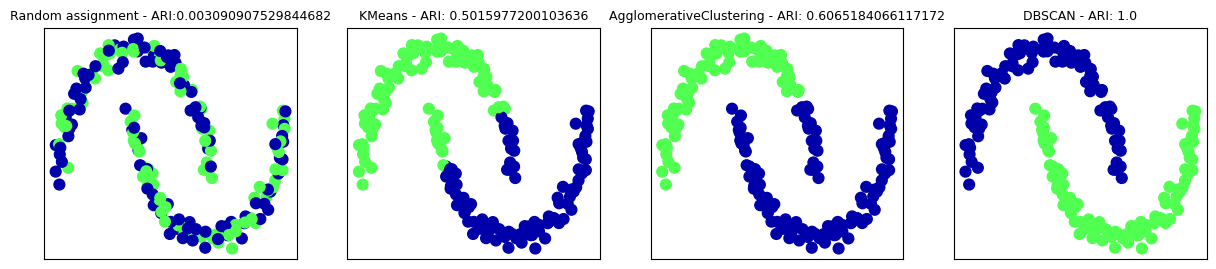

In [25]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)  # yには各点のクラスラベルが入っている

# データの平均を0, 分散を1に正規化する
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={"xticks": (), "yticks": ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

np.random.seed(0)
random_clusters = np.random.randint(low=0, high=2, size=len(X))

# ランダムな割り当てをプロット
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title(f"Random assignment - ARI:{adjusted_rand_score(y, random_clusters)}", fontsize=9)

for ax, algorithm in zip(axes[1:], algorithms):
    # クラスタ割り当てとクラスタセンタをプロット
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title(f"{algorithm.__class__.__name__} - ARI: {adjusted_rand_score(y, clusters)}", fontsize=9)


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
random_forest.score(X_test, y_test)


0.975